In [90]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [91]:
X=pd.read_csv('healthcare-dataset-stroke-data.csv')
X.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [92]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Xử lý missing values

In [93]:
null= X.isna().sum()
per_null= X.isna().sum()/X.isna().count()*100
per_null= round(per_null, 1)
missing_data= pd.concat([null, per_null], axis=1,keys=['number of missing values', '% of missig values'])
missing_data

,number of missing values,% of missig values
id,0,0.0
gender,0,0.0
age,0,0.0
hypertension,0,0.0
heart_disease,0,0.0
ever_married,0,0.0
work_type,0,0.0
Residence_type,0,0.0
avg_glucose_level,0,0.0
bmi,201,3.9


<Axes: >

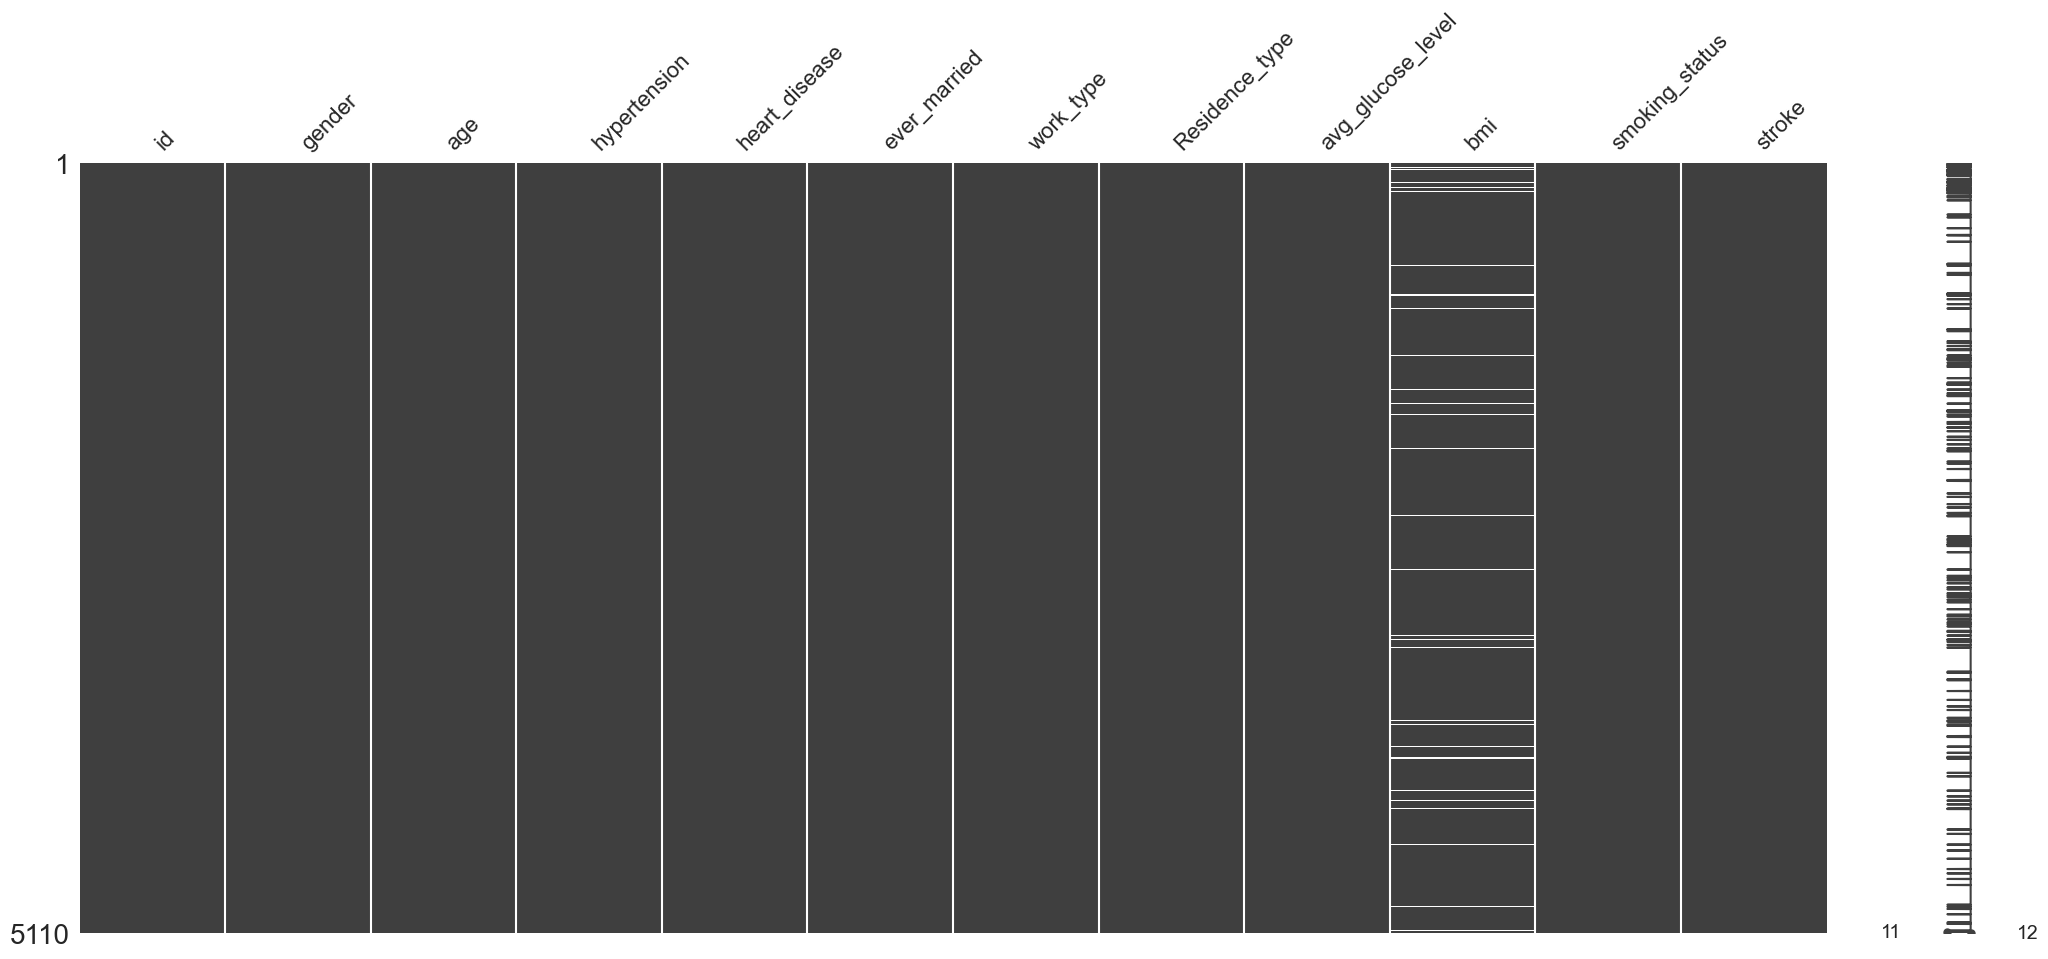

In [94]:
# chỉ có NULL values ở cột bmi
import missingno as ms
ms.matrix(X)

In [95]:
from sklearn.impute import SimpleImputer
# SimpleImputer được sử dụng để điền vào các giá trị thiếu bằng giá trị phổ biến nhất (most frequent) trong mỗi cột của dữ liệu.
# Imputation
my_imputer = SimpleImputer(strategy='most_frequent')
X_impute = pd.DataFrame(my_imputer.fit_transform(X))

# Đặt lại tên các cột
X_impute.columns = X.columns

<Axes: >

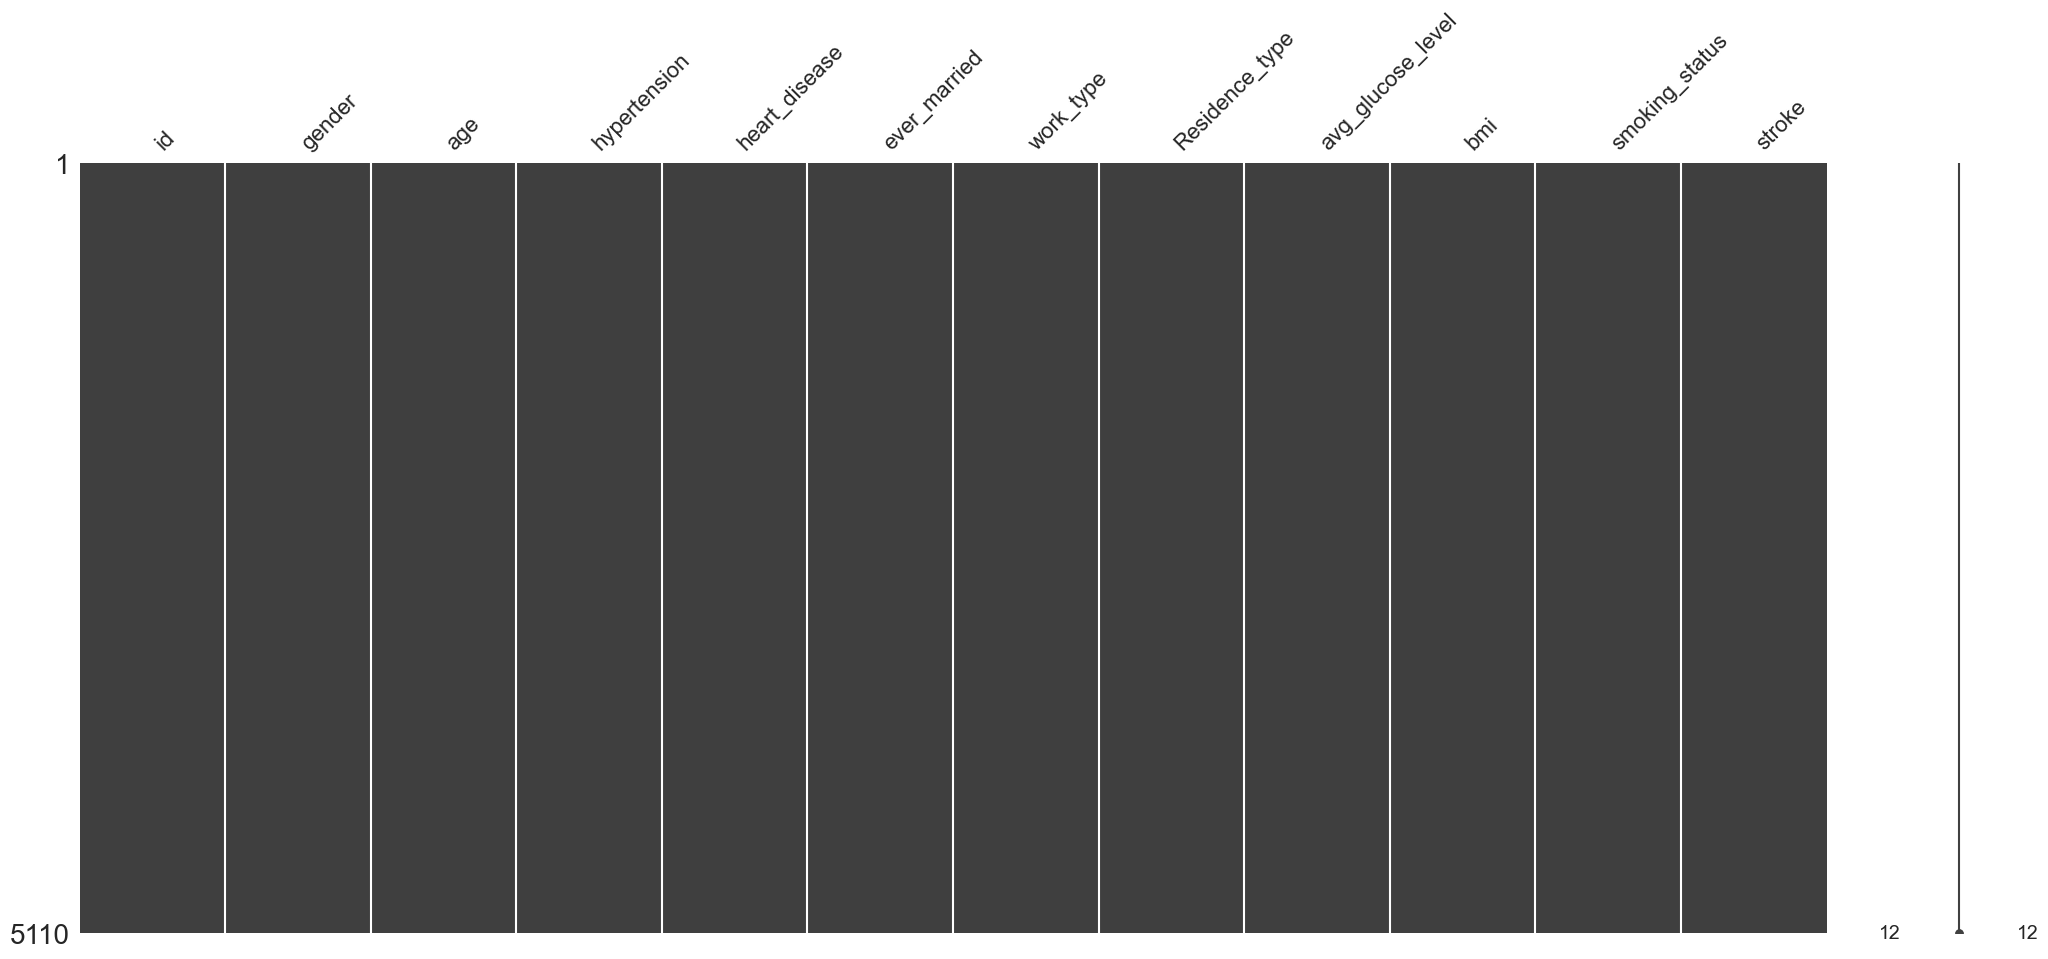

In [96]:
ms.matrix(X_impute)

# Xác định mối tương quan

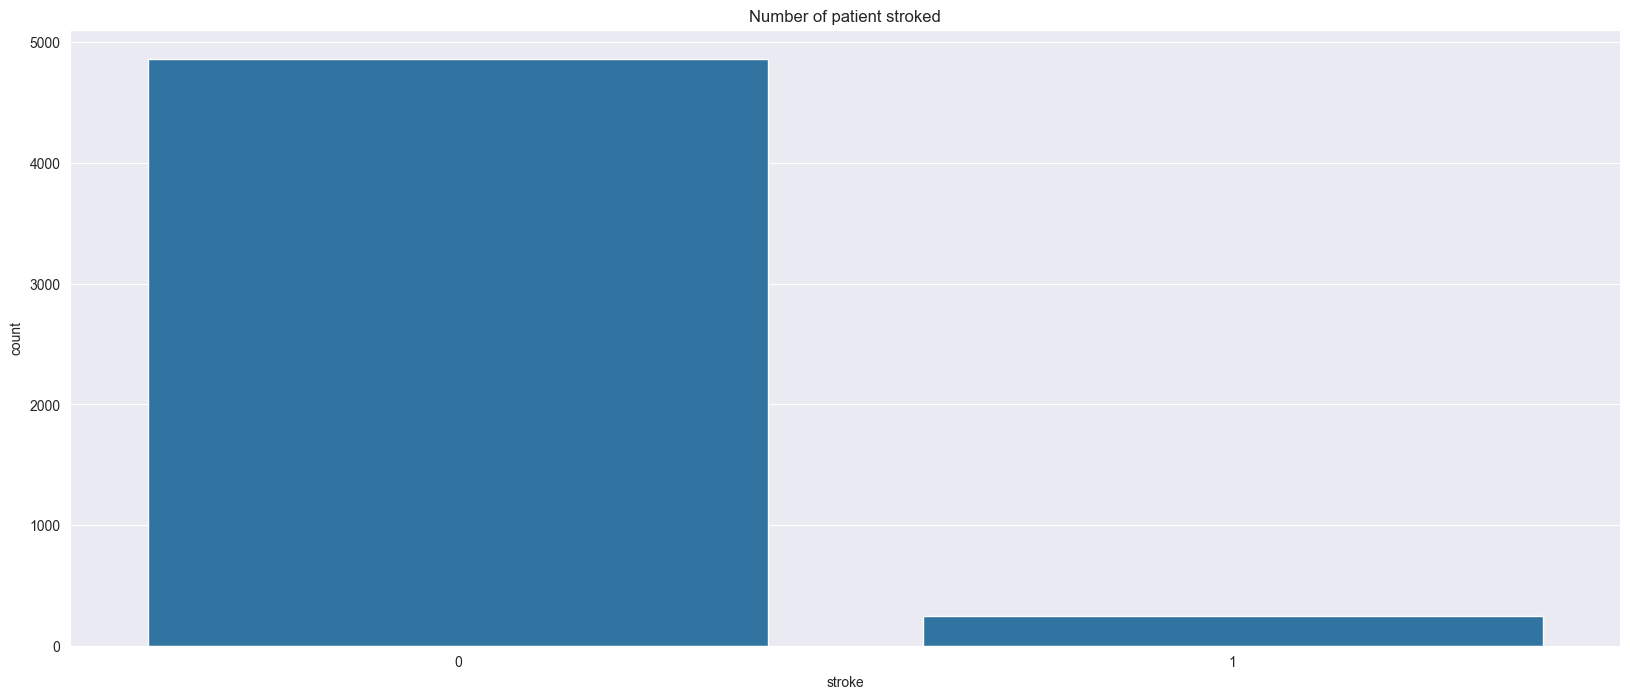

In [97]:
import seaborn as sns
sns.countplot(x=X_impute.stroke)
plt.title('Number of patient stroked')
plt.show()

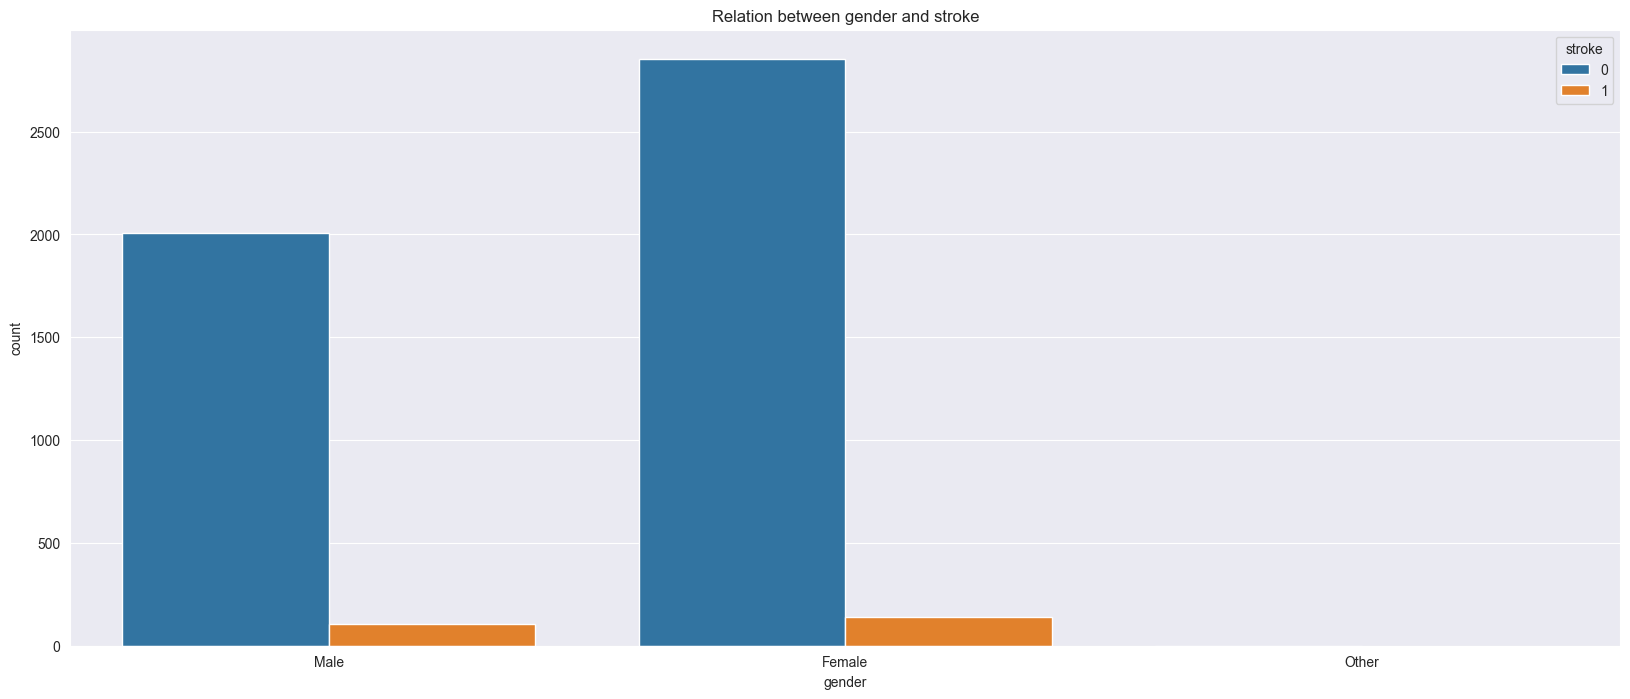

In [98]:
# relation between gender and stroke
sns.countplot(x=X_impute.gender,hue=X_impute.stroke)
plt.title('Relation between gender and stroke')
plt.show()

In [99]:
X_impute.groupby(['gender'])['stroke'].value_counts()

gender  stroke
Female  0         2853
        1          141
Male    0         2007
        1          108
Other   0            1
Name: count, dtype: int64

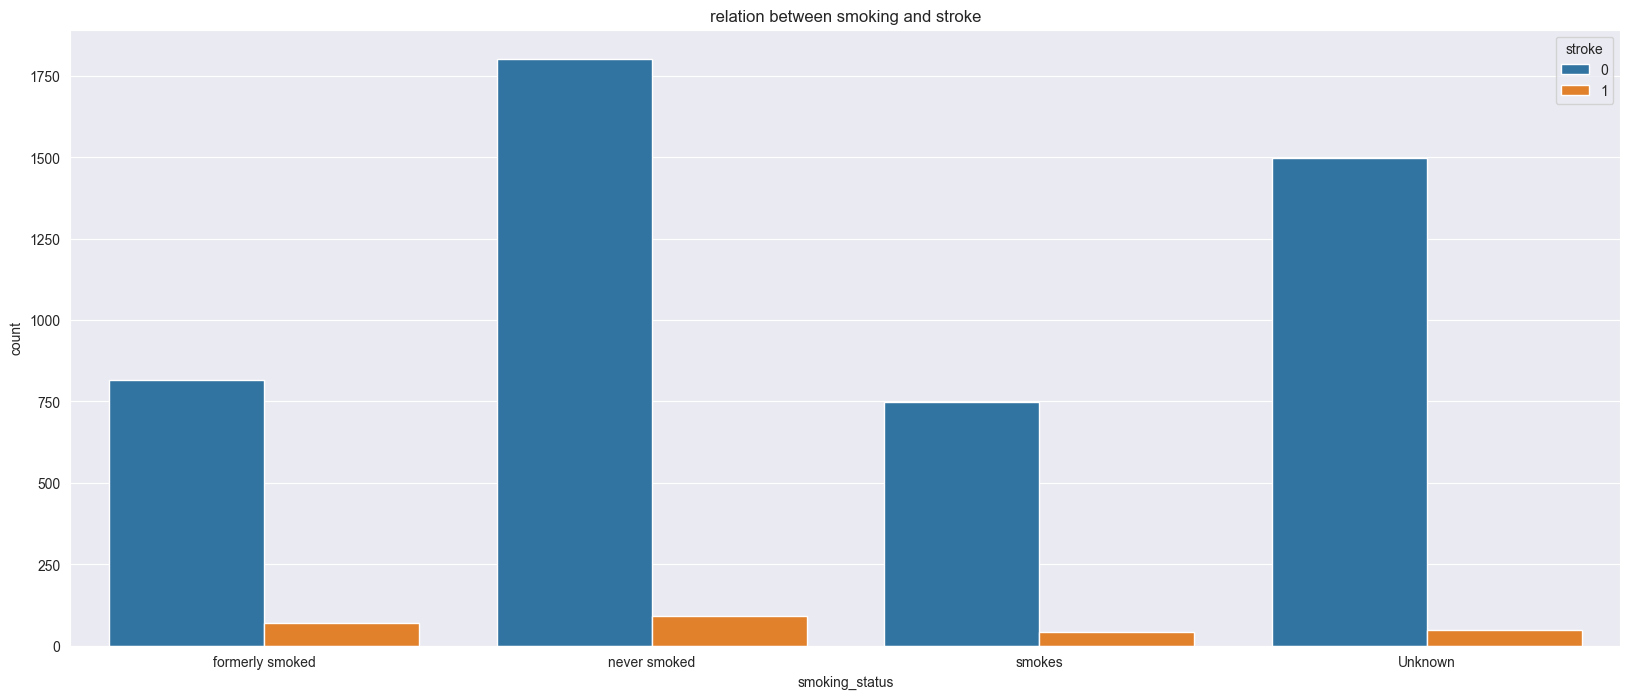

In [100]:
sns.countplot(x=X_impute.smoking_status,hue=X_impute.stroke)
plt.title('relation between smoking and stroke')
plt.show()

In [101]:
X.groupby("smoking_status")['stroke'].value_counts()

smoking_status   stroke
Unknown          0         1497
                 1           47
formerly smoked  0          815
                 1           70
never smoked     0         1802
                 1           90
smokes           0          747
                 1           42
Name: count, dtype: int64

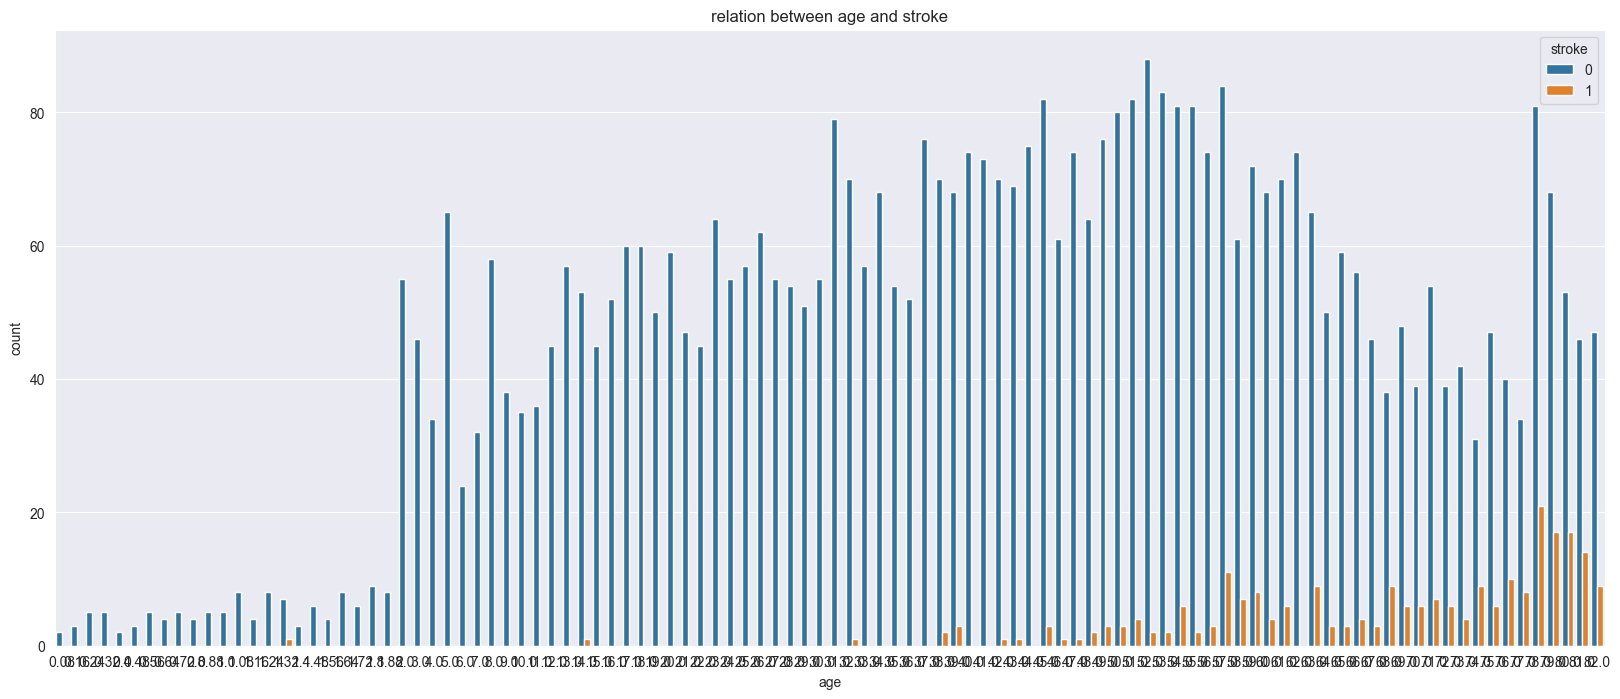

In [102]:
# Thấy rằng tuổi càng cao thì khả năng bị đột quỵ càng cao
sns.countplot(x=X_impute.age,hue=X_impute.stroke)
plt.title('relation between age and stroke')
plt.show()

# Thay đổi age thành 3 nhóm để cải thiện hiệu suất kết quả

In [103]:
def seprate_ages(row):
    if row.age > 45:
        row.age = 3 
    elif row.age > 30:
        row.age = 2
    else :
        row.age = 1
    return row

age_seprated_x=X_impute.apply(seprate_ages,axis='columns')
age_seprated_x.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,3,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,3,0,0,Yes,Self-employed,Rural,202.21,28.7,never smoked,1
2,31112,Male,3,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,3,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,3,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


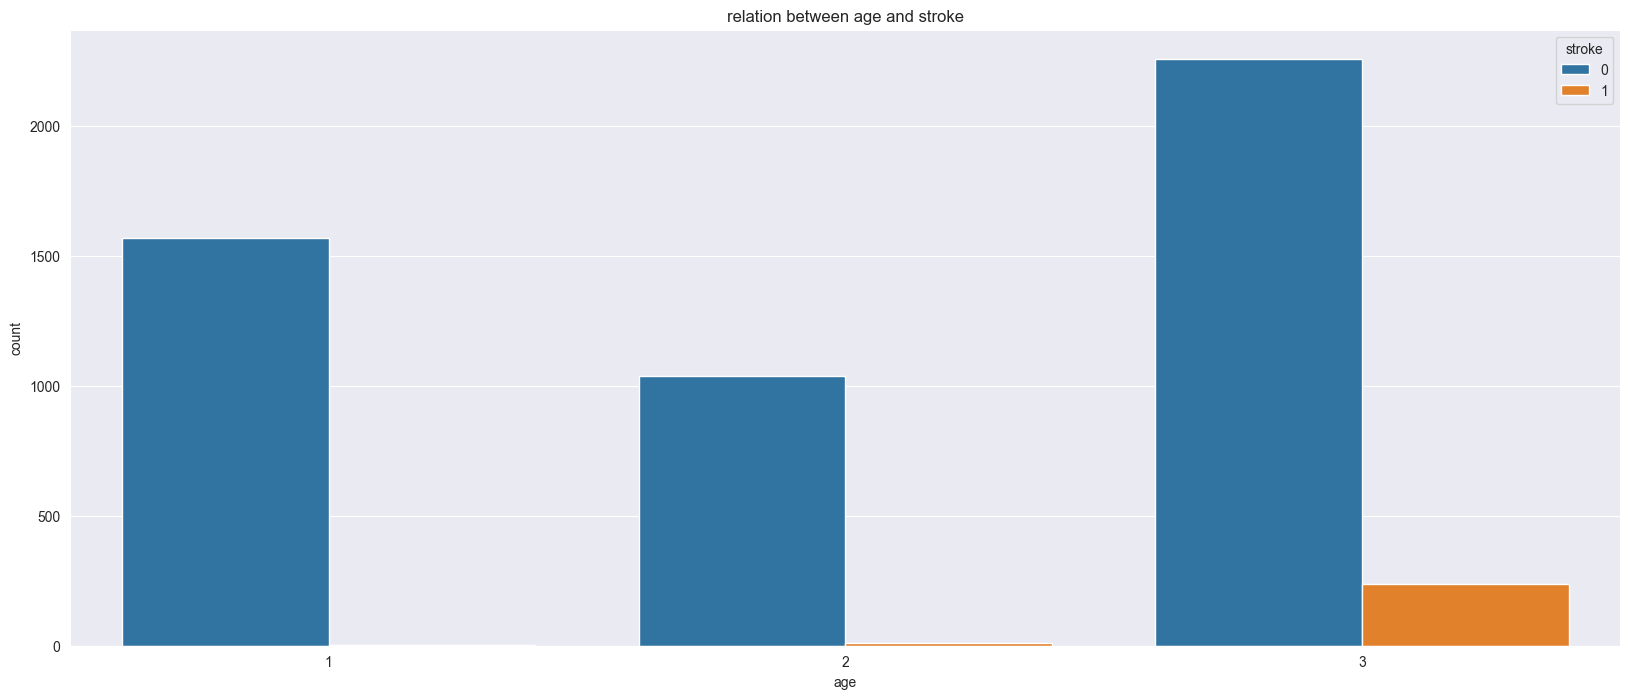

In [104]:
# Tuổi càng cao thì khả năng bị đột quỵ càng cao
sns.countplot(x=age_seprated_x.age,hue=age_seprated_x.stroke)
plt.title('relation between age and stroke')
plt.show()

In [105]:
# Có thể thấy hầu hết các cơn đột quỵ xảy ra ở độ tuổi trên 45
age_seprated_x.groupby('age')['stroke'].value_counts()

age  stroke
1    0         1568
     1            2
2    0         1037
     1           11
3    0         2256
     1          236
Name: count, dtype: int64

# Categorical And Numerical Data

In [106]:
# categorical_cols = [cols for cols in X.columns if X[cols].dtype=='object' and X[cols].nunique()<10]
# numerical_cols = [cols for cols in X.columns if X[cols].dtype in ['int64','float64']]

categorical_data = age_seprated_x.select_dtypes(include = ['object'])
numerical_data = data=age_seprated_x.select_dtypes(include=['integer', 'float'])

# Label Encode

In [107]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
features = categorical_data.apply(label_encoder.fit_transform)
features=features.join(numerical_data)
features.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,1,1,2,1,1,9046,3,0,1,228.69,36.6,1
1,0,1,3,0,2,51676,3,0,0,202.21,28.7,1
2,1,1,2,0,2,31112,3,0,1,105.92,32.5,1
3,0,1,2,1,3,60182,3,0,0,171.23,34.4,1
4,0,1,3,0,2,1665,3,1,0,174.12,24.0,1


In [108]:
y = features.stroke
features=features.drop('stroke',axis=1)


# Chia dữ liệu liệu thành tập training and validation

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train,y_val = train_test_split(features,y)
X_train

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi
985,0,1,2,1,2,46385,1,0,0,59.15,22.6
2536,1,0,2,0,3,36196,1,0,0,88.29,36.6
3657,1,0,4,0,0,6639,1,0,0,100.19,18.7
2173,0,1,2,1,3,38143,3,1,0,90.01,34.4
4867,1,1,3,1,1,47427,3,0,0,70.73,27.3
...,...,...,...,...,...,...,...,...,...,...,...
2051,0,1,2,0,2,37752,2,0,0,74.55,22.4
56,0,1,2,0,2,38829,3,0,0,59.32,33.2
2602,0,1,3,1,1,16652,3,0,0,99.68,17.6
942,1,1,3,1,2,28261,3,0,1,106.68,30.8


# MODELING

In [110]:
import sklearn

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff


from sklearn.metrics import accuracy_score, classification_report, roc_curve,precision_recall_curve, auc,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [111]:
def plot_cm(cm,title):
    z = cm
    x = ['No stroke', 'stroke']
    y = x
    # change each element of z to type string for annotations
    z_text = [[str(y) for y in x] for x in z]

    # set up figure 
    fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='deep')

    # add title
    fig.update_layout(title_text='<i><b>Confusion matrix {}</b></i>'.format(title),
                      #xaxis = dict(title='x'),
                      #yaxis = dict(title='x')
                     )

    # add custom xaxis title
    fig.add_annotation({'font':{'color':"black",'size':14},
                            'x':0.5,
                            'y':-0.10,
                            'showarrow':False,
                            'text':"Predicted value",
                            'xref':"paper",
                            'yref':"paper"})
    
    fig.add_annotation({'font':{'color':"black",'size':14},
                            'x':-0.15,
                            'y':0.5,
                            'showarrow':False,
                            'text':"Real value",
                            'textangle':-90,
                            'xref':"paper",
                            'yref':"paper"})


    # adjust margins to make room for yaxis title
    fig.update_layout(margin={'t':50, 'l':20},width=750,height=750)
    


    # add colorbar
    fig['data'][0]['showscale'] = True
    fig.show()



def hist_score(score):
    models_names = [
        'Logistic Regression',
    'KNearest Neighbor',
    'Decision Tree Classifier',
    'Random Forest Classifier',
    'SVM',
    'GaussianNB',
    'BernoulliNB']

    plt.rcParams['figure.figsize']=20,8
    sns.set_style('darkgrid')
    ax = sns.barplot(x=models_names, y=score, palette = "inferno", saturation =2.0)
    plt.xlabel('Classifier Models', fontsize = 20 )
    plt.ylabel('% of Accuracy', fontsize = 20)
    plt.title('Accuracy of different Classifier Models on test set', fontsize = 20)
    plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
    plt.yticks(fontsize = 12)
    for i in ax.patches:
        width, height = i.get_width(), i.get_height()
        x, y = i.get_xy() 
        ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
    plt.show()

In [112]:
def run_exp_on_feature(x_train,y_train,x_test,y_test):
    models= [['Logistic Regression ',LogisticRegression()],
            ['KNearest Neighbor ',KNeighborsClassifier()],
            ['Decision Tree Classifier ',DecisionTreeClassifier()],
            ['Random Forest Classifier ',RandomForestClassifier()],
            ['SVM ',SVC()],
            ['GaussianNB', GaussianNB()],
            ['BernoulliNB', BernoulliNB()]]

    models_score = []
    for name,model in models:

        model = model
        model.fit(x_train,y_train)
        model_pred = model.predict(x_test)
        cm_model = confusion_matrix(y_test, model_pred)
        print(cm_model)
        models_score.append(accuracy_score(y_test,model.predict(x_test)))

        print(name)
        print('Validation Acuuracy: ',accuracy_score(y_test,model.predict(x_test)))
        print('Training Accuracy: ',accuracy_score(y_train,model.predict(x_train)))
        print('-------------------------------------------')
        plot_cm(cm_model,title=name+"model")
        fpr, tpr, thresholds = roc_curve(y_test, model_pred)

        fig = px.area(
            x=fpr, y=tpr,
            title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
            labels={'x':'False Positive Rate', 'y':'True Positive Rate'},
            width=700, height=500
        )
        fig.add_shape(
            type='line', line={'dash':'dash'},
            x0=0, x1=1, y0=0, y1=1
        )

        fig.update_yaxes(scaleanchor="x", scaleratio=1)
        fig.update_xaxes(constrain='domain')
        fig.show()
    
        
    return models_score




In [113]:
models_score = run_exp_on_feature(X_train,y_train,X_val,y_val)

[[1218    0]
 [  60    0]]
Logistic Regression 
Validation Acuuracy:  0.9530516431924883
Training Accuracy:  0.9506784968684759
-------------------------------------------


[[1218    0]
 [  59    1]]
KNearest Neighbor 
Validation Acuuracy:  0.9538341158059468
Training Accuracy:  0.9509394572025052
-------------------------------------------


[[1163   55]
 [  53    7]]
Decision Tree Classifier 
Validation Acuuracy:  0.9154929577464789
Training Accuracy:  1.0
-------------------------------------------


[[1218    0]
 [  60    0]]
Random Forest Classifier 
Validation Acuuracy:  0.9530516431924883
Training Accuracy:  1.0
-------------------------------------------


[[1218    0]
 [  60    0]]
SVM 
Validation Acuuracy:  0.9530516431924883
Training Accuracy:  0.9506784968684759
-------------------------------------------


[[1161   57]
 [  54    6]]
GaussianNB
Validation Acuuracy:  0.9131455399061033
Training Accuracy:  0.9157098121085595
-------------------------------------------


[[1211    7]
 [  59    1]]
BernoulliNB
Validation Acuuracy:  0.9483568075117371
Training Accuracy:  0.9438935281837161
-------------------------------------------


C:\Users\Ngoc Anh\AppData\Local\Temp\ipykernel_27984\3306280953.py:59: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




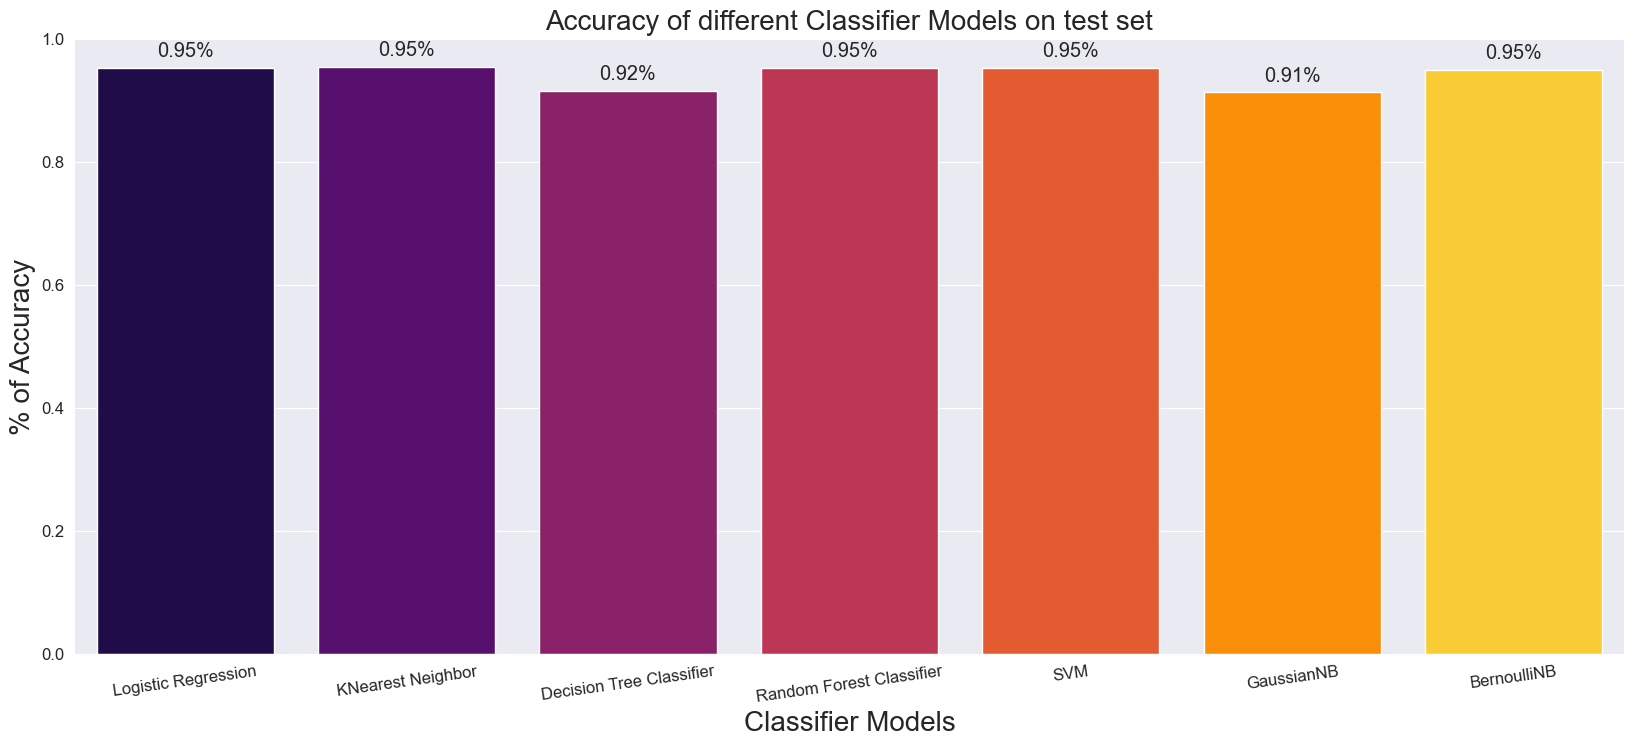

In [114]:
hist_score(models_score)